# Example: Post-processing OPES data with postmetad

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from postmetad import opes_metad
import matplotlib.pyplot as plt

## Constructing FES from COLVAR file

In [3]:
# Read COLVAR file (from PLUMED tutorial)
cvs = opes_metad.read_plumed_colvar_file("data/opes/COLVAR", colvar_cols=[1, 2], bias_col=3)

### Constructing FES using reweighting

(40001, 2)
(40001,)


/Users/apallath/Documents/postmetad/postmetad/opes_metad.py:132: RuntimeWarning: divide by zero encountered in log
  bF = -np.log(p)


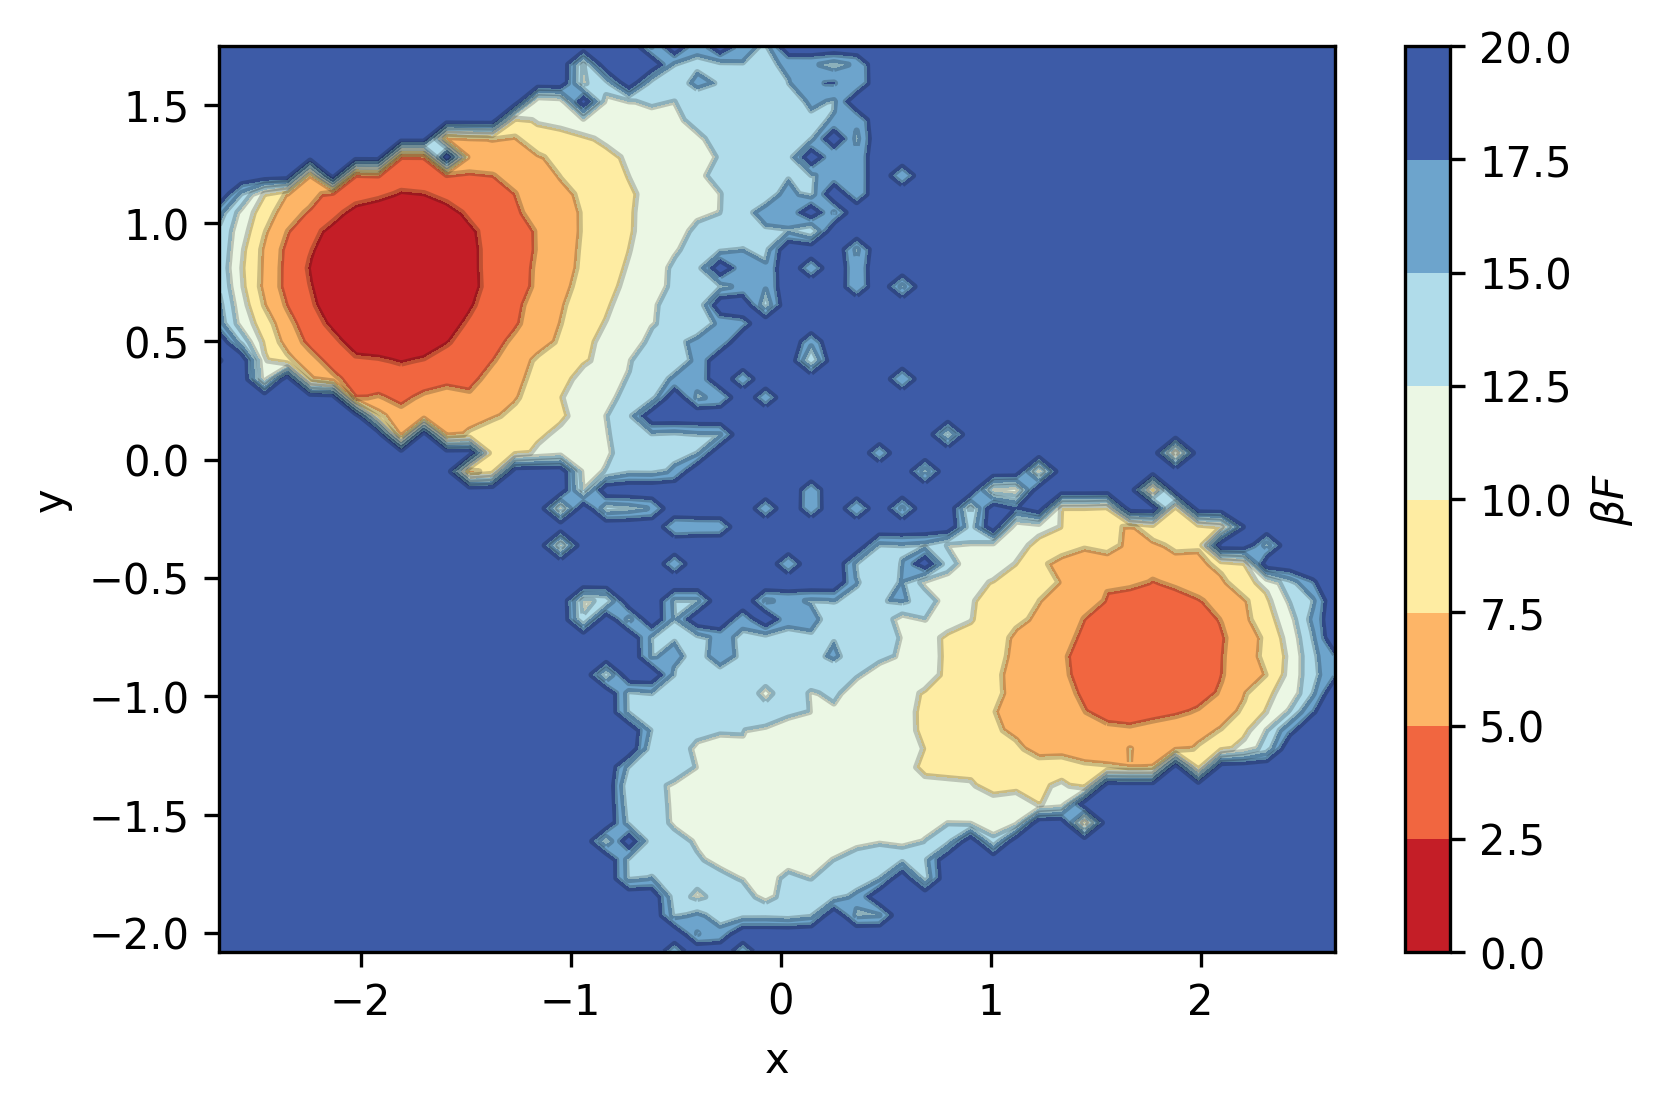

In [4]:
# 2D FES
bF, edges = opes_metad.fes_from_colvars(cvs, bins=50)
fig, ax, cbar = opes_metad.plot_2D_fes(bF, edges[0], edges[1], clip_max=20)
ax.set_xlabel("x")
ax.set_ylabel("y")
cbar.set_label(r"$\beta F$")

Text(0, 0.5, '$\\beta F$')

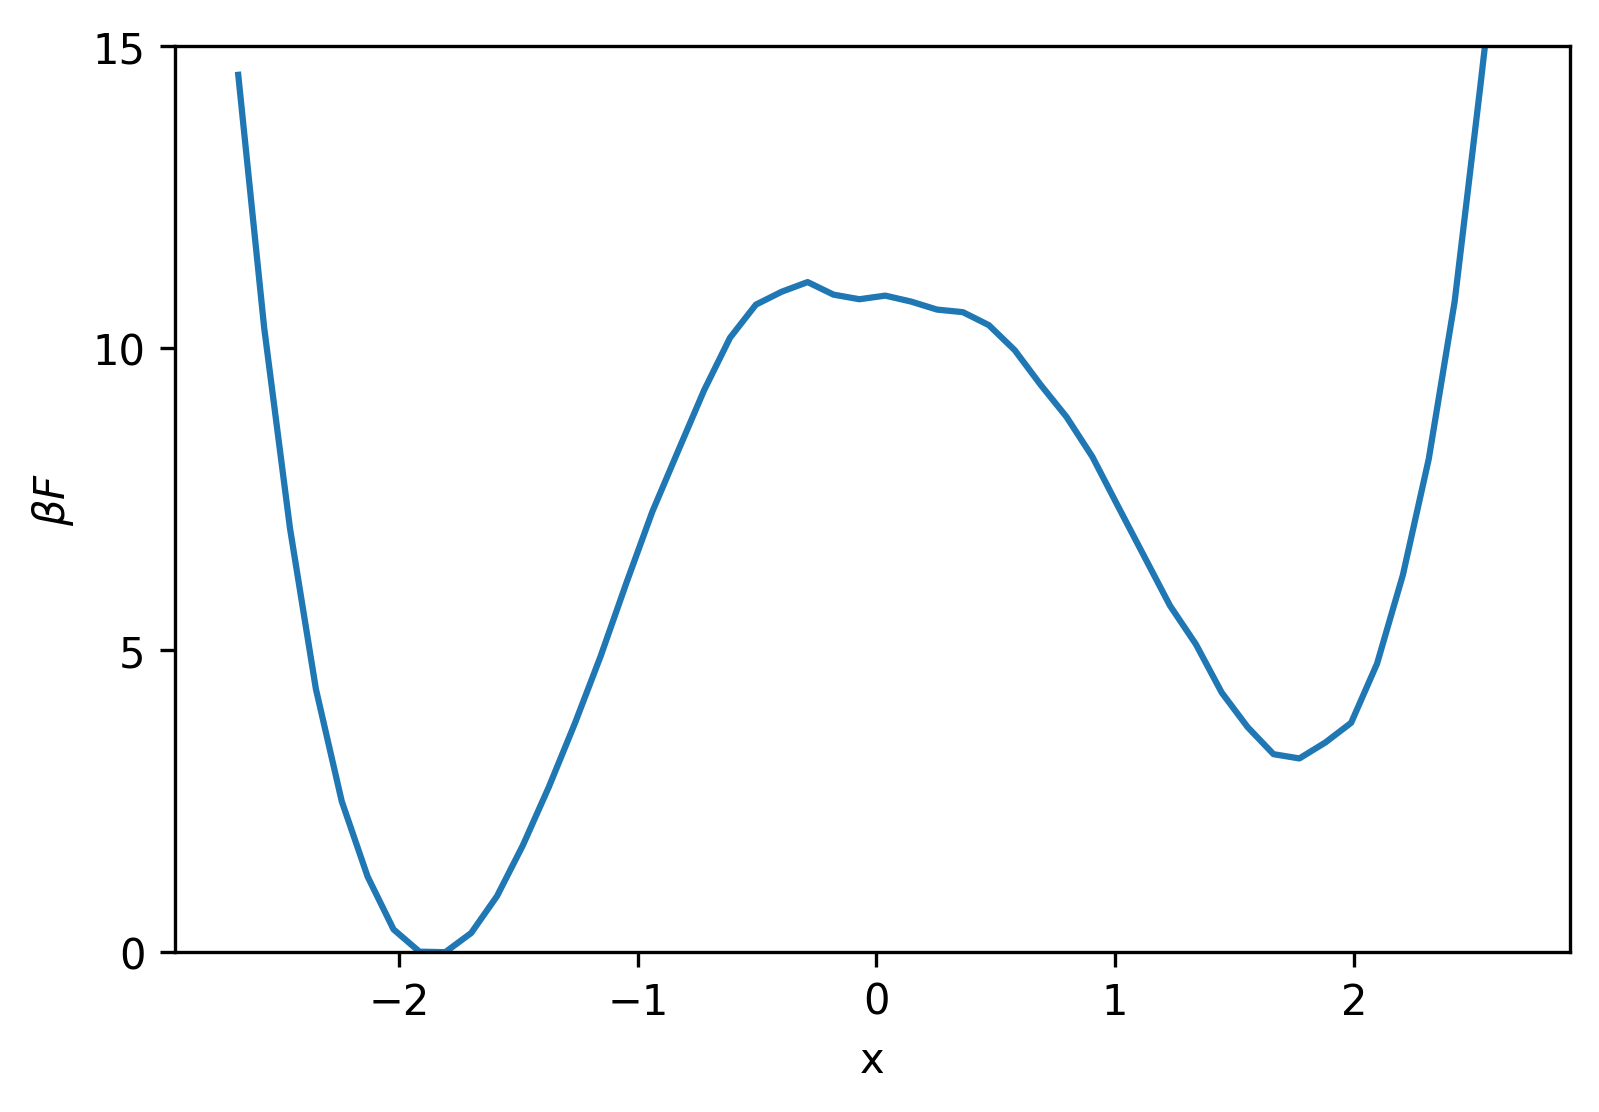

In [5]:
# 1D FES along x
bF_x = opes_metad.integrate_out_fes(bF, 1)  # integrate out y-dimension
fig, ax = opes_metad.plot_1D_fes(bF_x, edges[0])
ax.set_ylim(0, 15)
ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel("x")
ax.set_ylabel(r"$\beta F$")

Text(0, 0.5, '$\\beta F$')

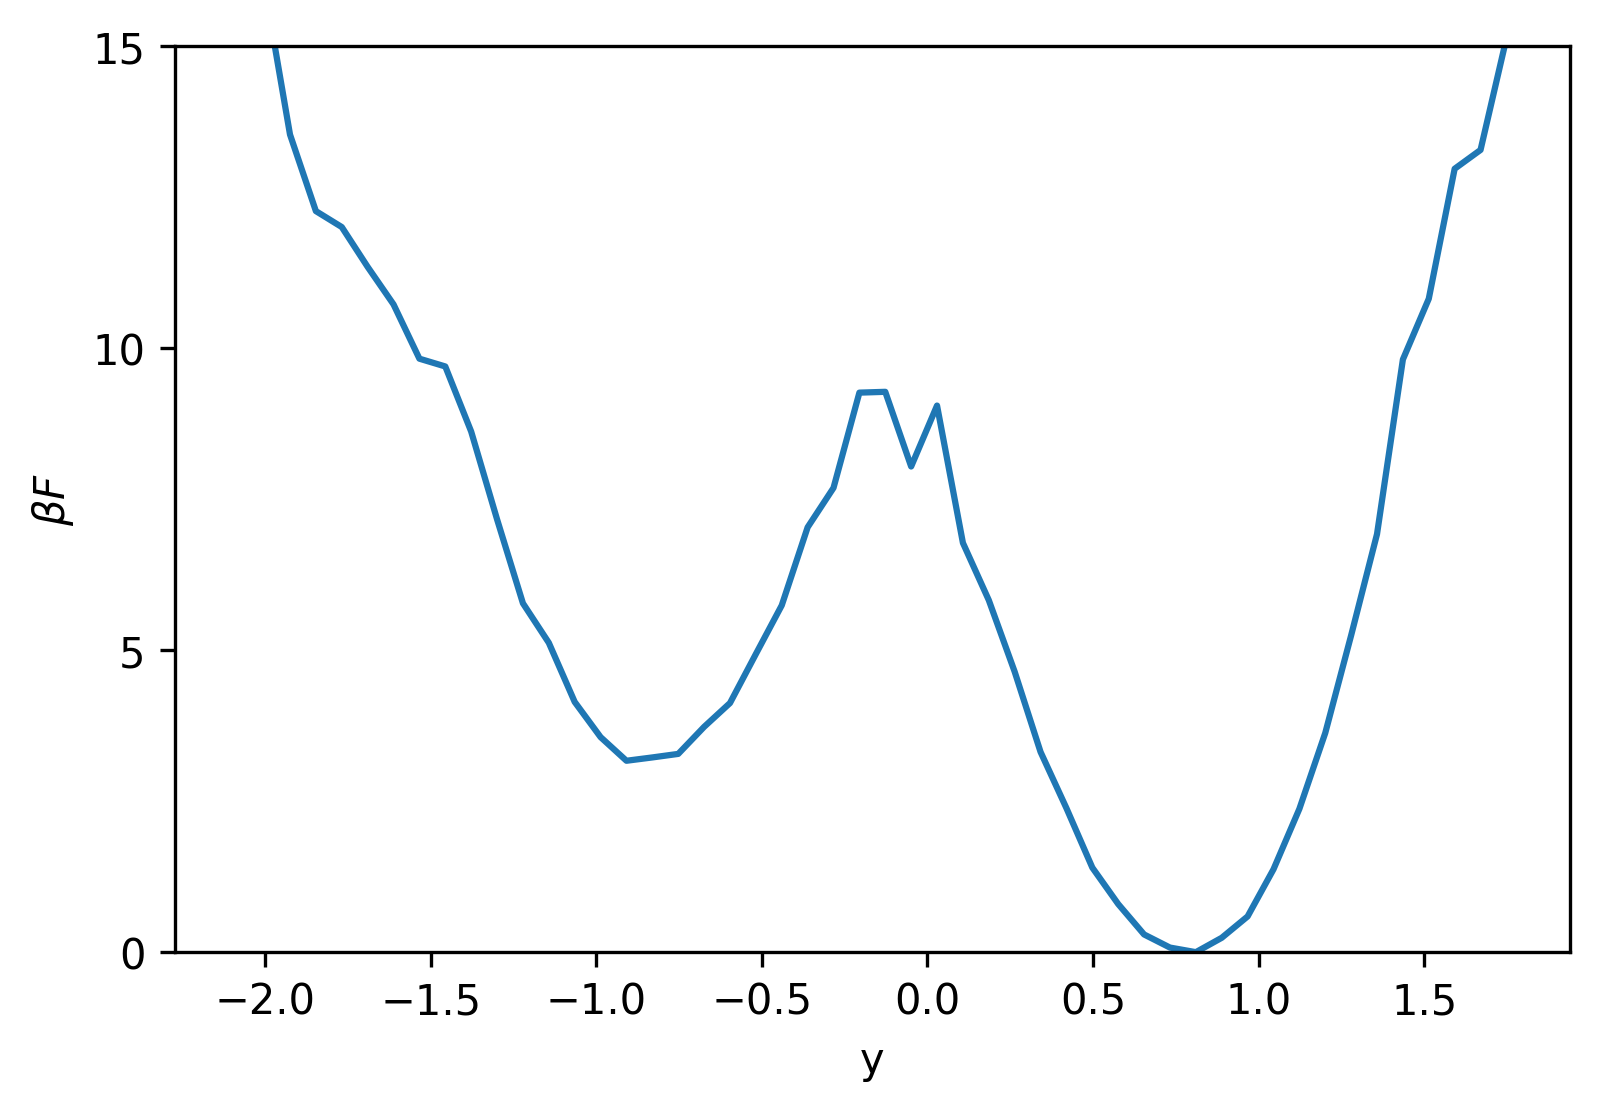

In [6]:
# 1D FES along y
bF_y = opes_metad.integrate_out_fes(bF, 0)  # integrate out x-dimension
fig, ax = opes_metad.plot_1D_fes(bF_y, edges[1])
ax.set_ylim(0, 15)
ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel("y")
ax.set_ylabel(r"$\beta F$")